## Logistic Regression
### Based on Code from Carl Shan and Jen Selby

First, we import the scipy libraries utilized in this project

In [1]:
import numpy.random
from sklearn import linear_model
import matplotlib.pyplot

Next, we define the average heights & widths for each plant type.

In [2]:
NUM_INPUTS = 1000
PLANT_A_AVG_HEIGHT = 60.0
PLANT_A_AVG_WIDTH = 8.0
PLANT_B_AVG_HEIGHT = 58.0
PLANT_B_AVG_WIDTH = 10.0
PLANT_C_AVG_HEIGHT = 55.0
PLANT_C_AVG_WIDTH = 5.0

We then generate data points around those assumed averages.

In [3]:
plantA_heights = numpy.random.normal(loc=PLANT_A_AVG_HEIGHT, size=NUM_INPUTS)
plantA_widths = numpy.random.normal(loc=PLANT_A_AVG_WIDTH, size=NUM_INPUTS)

plantB_heights = numpy.random.normal(loc=PLANT_B_AVG_HEIGHT, size=NUM_INPUTS)
plantB_widths = numpy.random.normal(loc=PLANT_B_AVG_WIDTH, size=NUM_INPUTS)

plantC_heights = numpy.random.normal(loc=PLANT_C_AVG_HEIGHT, size=NUM_INPUTS)
plantC_widths = numpy.random.normal(loc=PLANT_C_AVG_WIDTH, size=NUM_INPUTS)

We then combine those generate inputs into a list and then print it out to assure it's acting as it should.

In [4]:
plant_heights = list(numpy.append(list(numpy.append(plantA_heights, plantB_heights)), plantC_heights))

In [5]:
plant_widths = list(numpy.append(list(numpy.append(plantA_widths, plantB_widths)), plantC_widths))

In [6]:
plant_inputs = list(zip(plant_heights, plant_widths))

In [7]:
plant_inputs

[(59.737128761695523, 6.8233851053219823),
 (60.31752877618711, 7.6811304967241876),
 (61.483661621784051, 6.9100651198104721),
 (59.72954368005405, 7.7581985178977302),
 (58.768320876705765, 7.9519847668465982),
 (59.704814614971824, 10.177121758665731),
 (60.872245673616696, 9.3680097616469808),
 (62.125887673552839, 8.1916755901920109),
 (58.740680163948063, 6.6230389780513841),
 (58.985817114768089, 8.882417117080001),
 (60.328097706084684, 8.5543776919342918),
 (59.016523418018089, 9.0946791958671955),
 (60.561388834318223, 6.3320437617392784),
 (58.92323605810364, 8.9153095833669607),
 (59.695660235375946, 10.232100085578548),
 (61.456151736417709, 8.0224688423498769),
 (58.783412523831096, 7.0240326588614188),
 (58.620267661805435, 9.2162808776900089),
 (60.243052473496085, 8.1451630385540295),
 (60.327868887377115, 7.6734865155838854),
 (58.579436004585475, 6.8604430227839428),
 (59.341014782723462, 8.741504814852977),
 (61.059141940369983, 8.7789999439963005),
 (58.99756398948

We then generate type arrays for each of our 3 logistic regression models, to define certain plants as 0 (for successfully in a group) and 1 (for not in the group). We then print out one of these arrays to be clear that the correct arrays is generated.

In [8]:
plantA_types = [0]*NUM_INPUTS + [1]*(NUM_INPUTS*2)
plantB_types = [1]*NUM_INPUTS + [0]*NUM_INPUTS + [1]*NUM_INPUTS
plantC_types = [1]*(NUM_INPUTS*2) + [0]*NUM_INPUTS

In [9]:
plantA_types

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


We then fit 3 logistic models — one testing plants for type A, one for type B, and one for type C.

In [10]:
modelA = linear_model.LogisticRegression()
modelA.fit(plant_inputs, plantA_types)

modelB = linear_model.LogisticRegression()
modelB.fit(plant_inputs, plantB_types)

modelC = linear_model.LogisticRegression()
modelC.fit(plant_inputs, plantC_types)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

We then plot the data we have generated via matplotlib

In [11]:
matplotlib.pyplot.scatter(plantA_heights, plantA_widths, c="red", marker="o")
matplotlib.pyplot.scatter(plantB_heights, plantB_widths, c="blue", marker="^")
matplotlib.pyplot.scatter(plantC_heights, plantC_widths, c="green", marker="s")

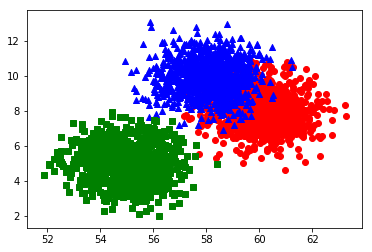

In [12]:
matplotlib.pyplot.show()

### Testing Our Model

We then generate new data points to test the accuracy of our model.

In [13]:
NUM_NEW = 5

npA_heights = numpy.random.normal(loc=PLANT_A_AVG_HEIGHT, size=NUM_NEW)
npA_widths = numpy.random.normal(loc=PLANT_A_AVG_WIDTH, size=NUM_NEW)

npB_heights = numpy.random.normal(loc=PLANT_B_AVG_HEIGHT, size=NUM_NEW)
npB_widths = numpy.random.normal(loc=PLANT_B_AVG_WIDTH, size=NUM_NEW)

npC_heights = numpy.random.normal(loc=PLANT_C_AVG_HEIGHT, size=NUM_NEW)
npC_widths = numpy.random.normal(loc=PLANT_C_AVG_WIDTH, size=NUM_NEW)

In [14]:
np_heights = list(numpy.append(list(numpy.append(npA_heights, npB_heights)), npC_heights))

In [15]:
np_widths = list(numpy.append(list(numpy.append(npA_widths, npB_widths)), npC_widths))

In [16]:
np_inputs = list(zip(np_heights, np_widths))

In [17]:
np_inputs

[(59.717792245845438, 9.1979700602652006),
 (61.210897784746912, 8.8473426361823861),
 (60.433779128735637, 6.1421255626188183),
 (60.584274107671099, 7.0800131517432687),
 (59.331553825565138, 7.0924931533228985),
 (57.422576379211165, 10.465705536799115),
 (58.781300789063117, 7.7965419187719682),
 (57.301873577523459, 10.345021596545944),
 (57.631161666267282, 8.6545202338606799),
 (57.130316494010209, 9.9797228980555897),
 (53.804172752622705, 4.8647755343089765),
 (54.4224873013655, 3.7753648749609758),
 (54.556727323137828, 6.2375347033534085),
 (55.475235613522543, 4.9352333764089034),
 (55.445258990303088, 5.1073764440624556)]

We then find the probably of each plant being in each group.

In [18]:
predictionA = modelA.predict_proba(np_inputs)
predictionB = modelB.predict_proba(np_inputs)
predictionC = modelC.predict_proba(np_inputs)
print(predictionA)
print(predictionB)
print(predictionC)

[[ 0.45503987  0.54496013]
 [ 0.61911742  0.38088258]
 [ 0.65214791  0.34785209]
 [ 0.62964597  0.37035403]
 [ 0.50488796  0.49511204]
 [ 0.20952101  0.79047899]
 [ 0.41985814  0.58014186]
 [ 0.20482461  0.79517539]
 [ 0.28168697  0.71831303]
 [ 0.20355684  0.79644316]
 [ 0.13600156  0.86399844]
 [ 0.19575638  0.80424362]
 [ 0.14482763  0.85517237]
 [ 0.23472419  0.76527581]
 [ 0.22737737  0.77262263]]
[[  5.31856716e-01   4.68143284e-01]
 [  2.29708438e-01   7.70291562e-01]
 [  1.31140700e-03   9.98688593e-01]
 [  8.95055539e-03   9.91049445e-01]
 [  1.50384340e-02   9.84961566e-01]
 [  9.76536159e-01   2.34638412e-02]
 [  7.79523724e-02   9.22047628e-01]
 [  9.71272695e-01   2.87273048e-02]
 [  4.51668364e-01   5.48331636e-01]
 [  9.43462809e-01   5.65371909e-02]
 [  1.22391469e-03   9.98776085e-01]
 [  9.51487182e-05   9.99904851e-01]
 [  1.63999272e-02   9.83600073e-01]
 [  7.31106021e-04   9.99268894e-01]
 [  1.06536701e-03   9.98934633e-01]]
[[  3.09711114e-03   9.96902889e-01]
 

We then assign the new data points a `marker` to represent the true value, and a color based on whichever model it's represented as closest to.

In [19]:
for x in range(0, len(np_inputs)):
    prob_A = predictionA[x][0]
    prob_B = predictionB[x][0]
    prob_C = predictionC[x][0]
    print(x)
    print(prob_A)
    print(prob_B)
    print(prob_C)
    if x < NUM_NEW:
        this_marker = "o"
    elif x < NUM_NEW*2:
        this_marker = "^"
    else:
        this_marker = "s"
    if max(prob_A, prob_B, prob_C) == prob_A:
        matplotlib.pyplot.scatter(np_inputs[x][0], np_inputs[x][1], c="red", marker=this_marker)
    elif max(prob_A, prob_B, prob_C) == prob_B:
        matplotlib.pyplot.scatter(np_inputs[x][0], np_inputs[x][1], c="blue", marker=this_marker)
    else:
        matplotlib.pyplot.scatter(np_inputs[x][0], np_inputs[x][1], c="green", marker=this_marker)

0
0.455039872853
0.531856716332
0.0030971111396
1
0.619117424476
0.2297084376
0.00679062739033
2
0.652147908648
0.00131140699515
0.672897997189
3
0.629645971611
0.00895055538665
0.220829256083
4
0.504887960529
0.0150384339581
0.20983970881
5
0.209521005344
0.976536158751
0.000197322164516
6
0.41985814211
0.0779523723574
0.0554988387862
7
0.204824606596
0.971272695159
0.0002538427343
8
0.281686970633
0.451668363864
0.00912771886133
9
0.203556839706
0.943462809067
0.0005472874601
10
0.136001556275
0.00122391469078
0.961686281891
11
0.195756377582
9.51487181928e-05
0.996126530021
12
0.144827628009
0.0163999271973
0.583717630056
13
0.234724191489
0.000731106020745
0.957917637232
14
0.22737737071
0.00106536701183
0.940450151337


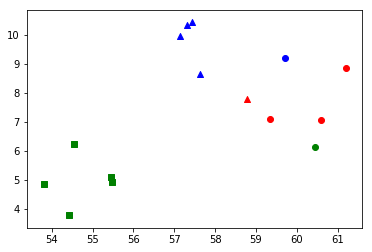

In [20]:
matplotlib.pyplot.show()